In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from datetime import timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load data

In [3]:
fout = '/glade/work/jiangzhu/data/aprp/b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001.PI_to_4xCO2.aprp.000101-015012.nc'
ds = xr.open_dataset(fout)

ds['time'] = ds.time.get_index('time') - timedelta(days=1)

ds

<xarray.Dataset>
Dimensions:      (time: 1800, lat: 96, lon: 144)
Coordinates:
  * lat          (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon          (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) object 0001-01-31 00:00:00 ... 0150-12-31 00:00:00
Data variables: (12/26)
    ts1          (time, lat, lon) float32 ...
    ts2          (time, lat, lon) float32 ...
    A1           (time, lat, lon) float32 ...
    A2           (time, lat, lon) float32 ...
    dA_c         (time, lat, lon) float32 ...
    dA_a_clr     (time, lat, lon) float32 ...
    ...           ...
    cloud_ga     (time, lat, lon) float32 ...
    cloud_mu     (time, lat, lon) float32 ...
    noncloud_ga  (time, lat, lon) float32 ...
    noncloud_mu  (time, lat, lon) float32 ...
    CRF          (time, lat, lon) float32 ...
    cs           (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001
    logname:           cmip6
    host:              cheyenne3
    initial_file:      b.e20.B1850.f19_g17.release_cesm2_1_0.020.cam.i.0301-0...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

# Compute annual mean

In [4]:
def monthly_to_yearly(ds):
    month_length = ds.time.dt.days_in_month
    wgts_mon = month_length.groupby(
        'time.year') / month_length.groupby('time.year').mean()
    ds_ann = (ds * wgts_mon).groupby('time.year').mean('time')
    return ds_ann.rename({'year': 'time'})


ds_ann = monthly_to_yearly(ds)
ds_ann

<xarray.Dataset>
Dimensions:      (time: 150, lat: 96, lon: 144)
Coordinates:
  * lat          (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon          (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) int64 1 2 3 4 5 6 7 8 ... 144 145 146 147 148 149 150
Data variables: (12/26)
    ts1          (time, lat, lon) float64 223.0 222.9 222.8 ... 256.5 256.5
    ts2          (time, lat, lon) float64 225.4 225.3 225.2 ... 274.1 274.1
    A1           (time, lat, lon) float64 0.4184 0.4185 0.4185 ... 0.3647 0.3647
    A2           (time, lat, lon) float64 0.4178 0.4178 0.4178 ... 0.3041 0.3042
    dA_c         (time, lat, lon) float64 -0.0003245 -0.0003244 ... 6.385e-05
    dA_a_clr     (time, lat, lon) float64 9.614e-05 9.837e-05 ... -0.006053
    ...           ...
    cloud_ga     (time, lat, lon) float64 0.6422 0.6414 0.6409 ... 0.5824 0.5803
    cloud_mu     (time, lat, lon) float64 -0.4397 -0.4398 ... 1.135 1.139
    noncloud_ga  (time, lat, lon) float64 -0.006902 -0.006671 ... 0.4027 0.4047
    noncloud_mu  (time, lat, lon) float64 0.559 0.5592 0.5593 ... 1.758 1.755
    CRF          (time, lat, lon) float64 0.5605 0.5595 0.5593 ... -38.66 -38.68
    cs           (time, lat, lon) float64 0.3867 0.3838 0.3834 ... 59.66 59.71

# Plot GMST

Text(0, 0.5, 'GMST (K)')

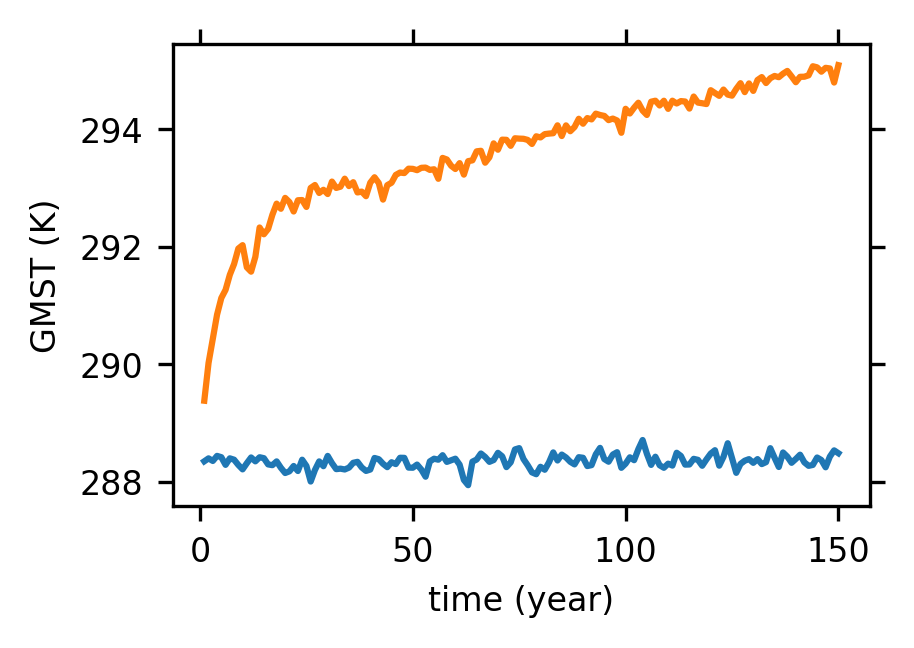

In [5]:
coslat = np.cos(np.deg2rad(ds_ann.lat))

plt.figure(figsize=(3, 2))
ds_ann.ts1.weighted(coslat).mean(('lat', 'lon')).plot()
ds_ann.ts2.weighted(coslat).mean(('lat', 'lon')).plot()
plt.gca().set_xlabel('time (year)')
plt.gca().set_ylabel('GMST (K)')

# Plot map of APRP sw cloud feedback

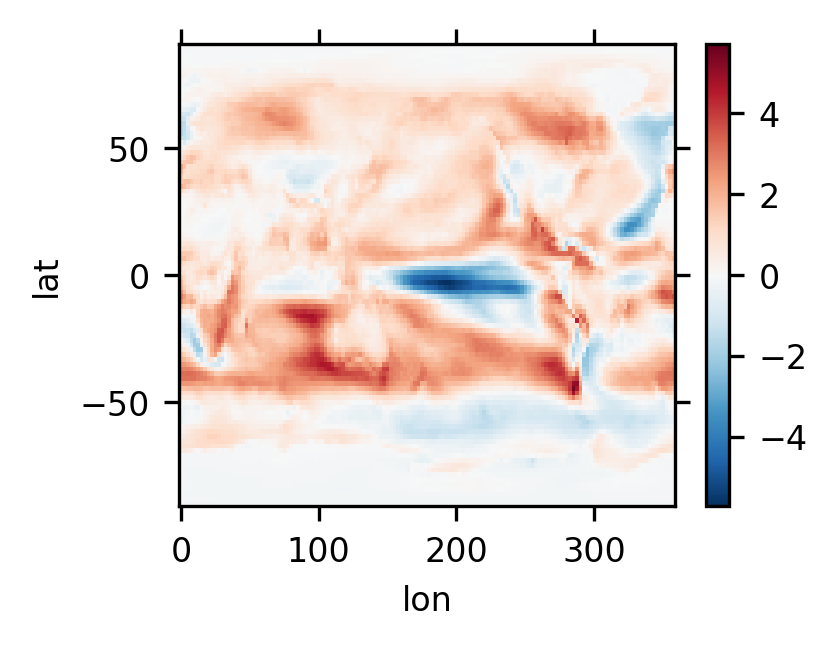

In [6]:
dGMST = (ds_ann.ts2 - ds_ann.ts1).weighted(coslat).mean(('lat', 'lon'))

cf_sw_aprp = ds_ann.cloud / dGMST
cf_sw_aprp.sel(time=slice(131, 150)).mean('time').plot(size=2)

# Plot time series of APRP sw cloud feedback

Text(0, 0.5, 'APRP sw cloud feedback (W m-2 K-1)')

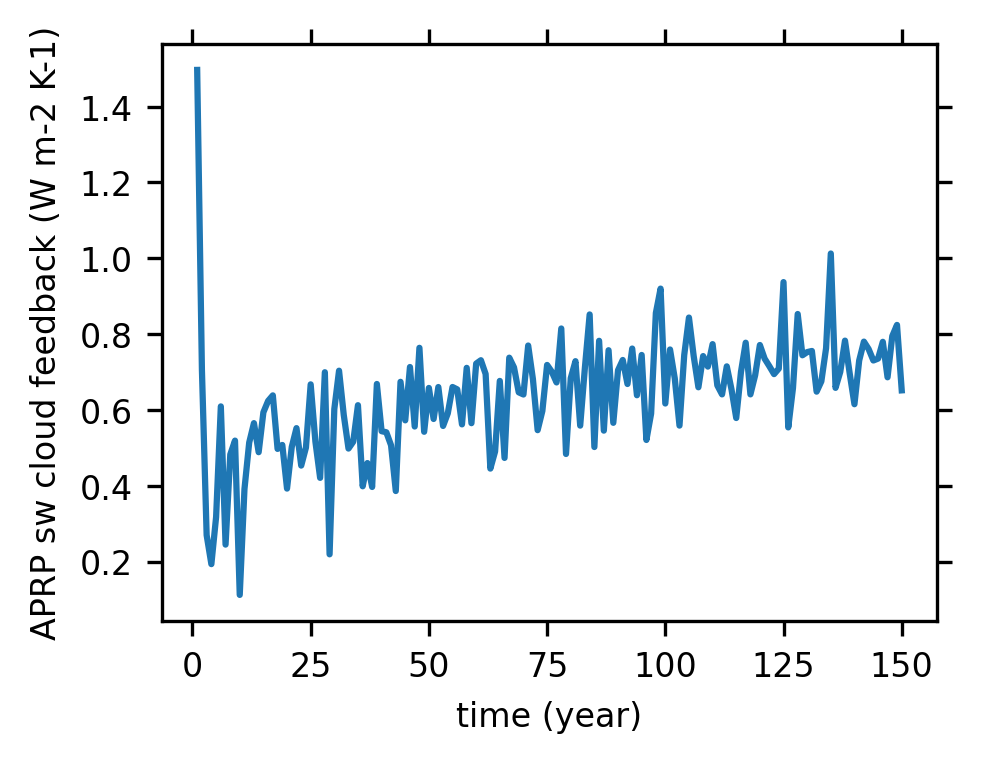

In [7]:
cf_sw_aprp.weighted(coslat).mean(('lat', 'lon')).plot(size=2.5)
plt.gca().set_xlabel('time (year)')
plt.gca().set_ylabel('APRP sw cloud feedback (W m-2 K-1)')